In [1]:
!pip install altair

     |████████████████████████████████| 819kB 34.0MB/s eta 0:00:01


In [2]:
import pandas as pd
import numpy as np
import scipy
from scipy import stats
import math
import matplotlib.pyplot as plt
import seaborn as sb
import altair as alt
import sklearn
from io import StringIO
import matplotlib.cm as cm
import statsmodels.api as sm
import csv
%matplotlib inline

In [3]:
credits_csv = pd.read_csv('credits.csv')
credits_csv.dropna()
credits_csv.head(3)

,person_id,id,name,character,role
0,60017,tm155702,Judy Garland,Dorothy Gale,ACTOR
1,53496,tm155702,Ray Bolger,Hunk / Scarecrow,ACTOR
2,79549,tm155702,Jack Haley,Hickory / Tin Man,ACTOR


In [4]:
movies_on_streaming_platforms = pd.read_csv('MoviesOnStreamingPlatforms.csv')
movies_on_streaming_platforms.dropna()
movies_on_streaming_platforms.head(5)
#len(movies_on_streaming_platforms) = 9515

,Unnamed: 0,ID,Title,Year,Age,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type
0,0,1,The Irishman,2019,18+,98/100,1,0,0,0,0
1,1,2,Dangal,2016,7+,97/100,1,0,0,0,0
2,2,3,David Attenborough: A Life on Our Planet,2020,7+,95/100,1,0,0,0,0
3,3,4,Lagaan: Once Upon a Time in India,2001,7+,94/100,1,0,0,0,0
4,4,5,Roma,2018,18+,94/100,1,0,0,0,0


In [5]:
netflix_movies = movies_on_streaming_platforms.loc[movies_on_streaming_platforms['Netflix'] == 1]
netflix_movies = netflix_movies.drop(['Unnamed: 0'], axis = 1)
netflix_movies = netflix_movies.dropna(subset = ['Rotten Tomatoes'])
netflix_movies['Rotten_Tomato_score'] = netflix_movies['Rotten Tomatoes'].str.split("/").apply(lambda x: (float(x[0]) / float(x[1])) * 10)

hulu_movies = movies_on_streaming_platforms.loc[movies_on_streaming_platforms['Hulu'] == 1]
hulu_movies = hulu_movies.drop(['Unnamed: 0'], axis = 1)
hulu_movies = hulu_movies.dropna(subset = ['Rotten Tomatoes'])
hulu_movies['Rotten_Tomato_score'] = hulu_movies['Rotten Tomatoes'].str.split("/").apply(lambda x: (float(x[0]) / float(x[1])) * 10)

prime_video_movies = movies_on_streaming_platforms.loc[movies_on_streaming_platforms['Prime Video'] == 1]
prime_video_movies = prime_video_movies.drop(['Unnamed: 0'], axis = 1)
prime_video_movies = prime_video_movies.dropna(subset = ['Rotten Tomatoes'])
prime_video_movies['Rotten_Tomato_score'] = prime_video_movies['Rotten Tomatoes'].str.split("/").apply(lambda x: (float(x[0]) / float(x[1])) * 10)

disney_movies = movies_on_streaming_platforms.loc[movies_on_streaming_platforms['Disney+'] == 1]
disney_movies = disney_movies.drop(['Unnamed: 0'], axis = 1)
disney_movies = disney_movies.dropna(subset = ['Rotten Tomatoes'])
disney_movies['Rotten_Tomato_score'] = disney_movies['Rotten Tomatoes'].str.split("/").apply(lambda x: (float(x[0]) / float(x[1])) * 10)

#netflix_movies
#hulu_movies
#prime_video_movies
#disney_movies

streaming_avg_scores = [netflix_movies['Rotten_Tomato_score'].mean(), hulu_movies['Rotten_Tomato_score'].mean(), prime_video_movies['Rotten_Tomato_score'].mean(), disney_movies['Rotten_Tomato_score'].mean()]


In [6]:
movies_on_streaming_platforms.describe()

,Unnamed: 0,ID,Year,Netflix,Hulu,Prime Video,Disney+,Type
count,9515.000000,9515.000000,9515.000000,9515.000000,9515.000000,9515.000000,9515.000000,9515.0
mean,4757.000000,4758.000000,2007.422386,0.388334,0.110037,0.432265,0.096900,0.0
std,2746.888239,2746.888239,19.130367,0.487397,0.312952,0.495417,0.295837,0.0
min,0.000000,1.000000,1914.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,2378.500000,2379.500000,2006.000000,0.000000,0.000000,0.000000,0.000000,0.0
50%,4757.000000,4758.000000,2015.000000,0.000000,0.000000,0.000000,0.000000,0.0
75%,7135.500000,7136.500000,2018.000000,1.000000,0.000000,1.000000,0.000000,0.0
max,9514.000000,9515.000000,2021.000000,1.000000,1.000000,1.000000,1.000000,0.0


In [7]:
netflix_movies.describe()

,ID,Year,Netflix,Hulu,Prime Video,Disney+,Type,Rotten_Tomato_score
count,3688.000000,3688.000000,3688.0,3688.000000,3688.000000,3688.000000,3688.0,3688.000000
mean,1844.500000,2014.782809,1.0,0.010575,0.029555,0.001627,0.0,5.444794
std,1064.778224,8.035874,0.0,0.102303,0.169380,0.040307,0.0,1.384762
min,1.000000,1954.000000,1.0,0.000000,0.000000,0.000000,0.0,1.000000
25%,922.750000,2014.000000,1.0,0.000000,0.000000,0.000000,0.0,4.500000
50%,1844.500000,2017.000000,1.0,0.000000,0.000000,0.000000,0.0,5.300000
75%,2766.250000,2019.000000,1.0,0.000000,0.000000,0.000000,0.0,6.300000
max,3688.000000,2021.000000,1.0,1.000000,1.000000,1.000000,0.0,9.800000


In [8]:
hulu_movies.describe()

,ID,Year,Netflix,Hulu,Prime Video,Disney+,Type,Rotten_Tomato_score
count,1047.000000,1047.000000,1047.000000,1047.0,1047.000000,1047.000000,1047.0,1047.000000
mean,4078.504298,2011.797517,0.037249,1.0,0.094556,0.005731,0.0,6.039733
std,695.132786,11.680215,0.189463,0.0,0.292740,0.075520,0.0,1.145966
min,81.000000,1923.000000,0.000000,1.0,0.000000,0.000000,0.0,1.200000
25%,3918.500000,2010.000000,0.000000,1.0,0.000000,0.000000,0.0,5.250000
50%,4180.000000,2016.000000,0.000000,1.0,0.000000,0.000000,0.0,6.000000
75%,4441.500000,2019.000000,0.000000,1.0,0.000000,0.000000,0.0,6.800000
max,4703.000000,2021.000000,1.000000,1.0,1.000000,1.000000,0.0,9.400000


In [9]:
prime_video_movies.describe()

,ID,Year,Netflix,Hulu,Prime Video,Disney+,Type,Rotten_Tomato_score
count,4113.000000,4113.000000,4113.000000,4113.000000,4113.0,4113.000000,4113.0,4113.000000
mean,6464.081935,2002.080233,0.026501,0.024070,1.0,0.003161,0.0,5.039874
std,1439.790301,22.887686,0.160640,0.153285,0.0,0.056138,0.0,1.173904
min,117.000000,1914.000000,0.000000,0.000000,1.0,0.000000,0.0,1.200000
25%,5531.000000,1999.000000,0.000000,0.000000,1.0,0.000000,0.0,4.200000
50%,6559.000000,2012.000000,0.000000,0.000000,1.0,0.000000,0.0,4.900000
75%,7587.000000,2017.000000,0.000000,0.000000,1.0,0.000000,0.0,5.800000
max,8615.000000,2021.000000,1.000000,1.000000,1.0,1.000000,0.0,9.300000


In [10]:
disney_movies.describe()

,ID,Year,Netflix,Hulu,Prime Video,Disney+,Type,Rotten_Tomato_score
count,922.000000,922.000000,922.000000,922.000000,922.000000,922.0,922.0,922.000000
mean,8951.703905,1997.033623,0.006508,0.006508,0.014100,1.0,0.0,5.831236
std,834.425418,24.898795,0.080450,0.080450,0.117966,0.0,0.0,1.395331
min,271.000000,1922.000000,0.000000,0.000000,0.000000,1.0,0.0,1.000000
25%,8824.250000,1990.000000,0.000000,0.000000,0.000000,1.0,0.0,4.800000
50%,9054.500000,2006.000000,0.000000,0.000000,0.000000,1.0,0.0,5.750000
75%,9284.750000,2016.000000,0.000000,0.000000,0.000000,1.0,0.0,6.775000
max,9515.000000,2021.000000,1.000000,1.000000,1.000000,1.0,0.0,9.600000


In [11]:
services_avg = [['Netflix', streaming_avg_scores[0]], ['Hulu', streaming_avg_scores[1]], ['Prime Video', streaming_avg_scores[2]], ['Disney+', streaming_avg_scores[3]]]
streaming_avg_score_df = pd.DataFrame(services_avg, columns = ['Service_Name', 'Avg_Score'])
streaming_avg_score_df

,Service_Name,Avg_Score
0,Netflix,5.444794
1,Hulu,6.039733
2,Prime Video,5.039874
3,Disney+,5.831236


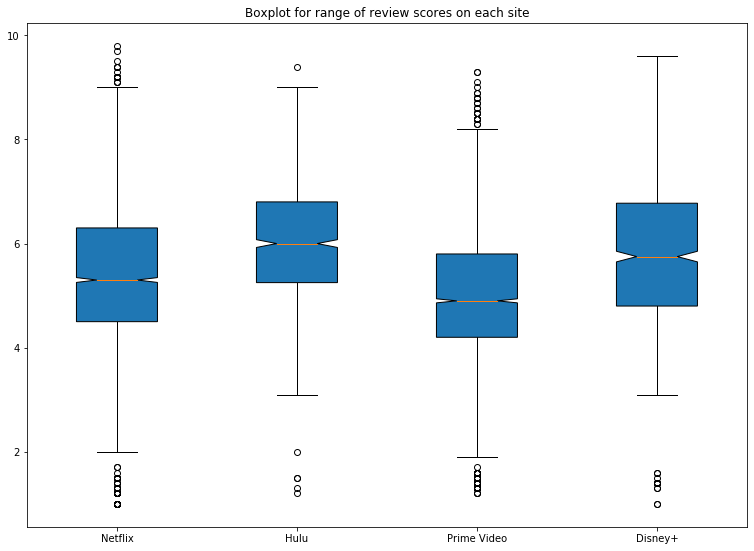

In [12]:
data = [netflix_movies['Rotten_Tomato_score'].to_numpy(), hulu_movies['Rotten_Tomato_score'].to_numpy(), prime_video_movies['Rotten_Tomato_score'].to_numpy(), disney_movies['Rotten_Tomato_score'].to_numpy()]

fig = plt.figure(figsize = (10, 7))
ax = fig.add_axes([0, 0, 1, 1])
ax.set_xticklabels(['Netflix', 'Hulu', 'Prime Video', 'Disney+'])
bp = ax.boxplot(data, patch_artist = True, notch ='True', vert = 1)
plt.title('Boxplot for range of review scores on each site')
plt.show()

In [13]:
title_akas_tsv = pd.read_csv('title_akas.tsv', sep = "\t", header = 0)
title_akas_tsv.dropna()
#title_akas_tsv.rename(columns = {title_akas_tsv.columns[0]: "tconst"}, inplace = True)
title_akas_tsv.head(5)

,titleId,ordering,title,region,language,types,attributes,isOriginalTitle
0,tt0000001,1,Карменсіта,UA,\N,imdbDisplay,\N,0
1,tt0000001,2,Carmencita,DE,\N,\N,literal title,0
2,tt0000001,3,Carmencita - spanyol tánc,HU,\N,imdbDisplay,\N,0
3,tt0000001,4,Καρμενσίτα,GR,\N,imdbDisplay,\N,0
4,tt0000001,5,Карменсита,RU,\N,imdbDisplay,\N,0


In [14]:
title_basics_tsv = pd.read_csv('title_basics.tsv', sep = "\t", header = 0)
title_basics_tsv.dropna()
title_basics_tsv.rename(columns = {title_basics_tsv.columns[0]: "tconst"}, inplace = True)
title_basics_tsv.head(5)
#len(title_basics_tsv) = 9624113

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"


In [15]:
title_ratings_tsv = pd.read_csv('title_ratings.tsv', sep = "\t")
title_ratings_tsv.dropna()
title_ratings_tsv.rename(columns = {title_ratings_tsv.columns[0]: "tconst"}, inplace = True)
title_ratings_tsv.head(5)
# len(title_ratings_tsv) = 1280582

,tconst,averageRating,numVotes
0,tt0000001,5.7,1953
1,tt0000002,5.8,264
2,tt0000003,6.5,1786
3,tt0000004,5.6,179
4,tt0000005,6.2,2587


In [16]:
title_tsv = pd.merge(title_basics_tsv, title_ratings_tsv, on = 'tconst')
title_tsv = pd.merge(title_tsv, title_akas_tsv, left_on = 'originalTitle', right_on = 'title')
title_tsv = title_tsv.loc[title_tsv['region'] == "US"]
title_tsv = title_tsv.drop(['primaryTitle', 'titleId', 'ordering', 'title', 'region', 'language', 'attributes', 'isOriginalTitle'], axis = 1)
title_tsv = title_tsv.drop_duplicates(subset = ['originalTitle'], keep = 'first')
title_tsv = title_tsv.loc[title_tsv['titleType'] == 'movie']
title_tsv.head(5)

,tconst,titleType,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes,types
49,tt0000009,movie,Miss Jerry,0,1894,\N,45,Romance,5.3,204,imdbDisplay
596,tt0000147,movie,The Corbett-Fitzsimmons Fight,0,1897,\N,100,"Documentary,News,Sport",5.2,466,imdbDisplay
27196,tt0000574,movie,The Story of the Kelly Gang,0,1906,\N,70,"Action,Adventure,Biography",6.0,810,imdbDisplay
53025,tt0000615,movie,Robbery Under Arms,0,1907,\N,\N,Drama,4.3,24,imdbDisplay
58854,tt0000679,movie,The Fairylogue and Radio-Plays,0,1908,\N,120,"Adventure,Fantasy",5.2,67,imdbDisplay


In [17]:
title_tsv_2 = pd.merge(title_tsv, movies_on_streaming_platforms, left_on = 'originalTitle', right_on = 'Title')
title_tsv_2 = title_tsv_2.drop(['Unnamed: 0', 'Title', 'Type', 'types', 'tconst', 'titleType', 'startYear', 'endYear', 'isAdult', 'ID', 'Age'], axis = 1)
title_tsv_2.rename(columns = {'averageRating': 'IMDB_Rating'}, inplace = True)
title_tsv_2['Rotten_Tomato_score'] = title_tsv_2['Rotten Tomatoes'].str.split("/").apply(lambda x: (float(x[0]) / float(x[1])) * 10)
#title_tsv_2.columns
title_tsv_2.head()

,originalTitle,runtimeMinutes,genres,IMDB_Rating,numVotes,Year,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Rotten_Tomato_score
0,The Mystery of a Hansom Cab,\N,\N,3.0,11,2012,49/100,0,0,1,0,4.9
1,After the Ball,\N,Drama,6.0,15,2015,53/100,0,0,1,0,5.3
2,The Escape,60,Drama,5.6,53,2018,53/100,0,1,0,0,5.3
3,The Nightingale,\N,Drama,6.7,25,2018,71/100,0,1,0,0,7.1
4,The Patchwork Girl of Oz,81,"Adventure,Comedy,Family",5.5,516,1914,45/100,0,0,1,0,4.5


In [18]:
title_tsv_2.describe()

,IMDB_Rating,numVotes,Year,Netflix,Hulu,Prime Video,Disney+,Rotten_Tomato_score
count,4790.000000,4.790000e+03,4790.000000,4790.00000,4790.000000,4790.000000,4790.000000,4790.000000
mean,6.105532,3.241900e+04,2004.626931,0.31524,0.139248,0.502923,0.076200,5.625825
std,1.176890,1.175340e+05,21.891093,0.46466,0.346242,0.500044,0.265346,1.289103
min,1.100000,5.000000e+00,1914.000000,0.00000,0.000000,0.000000,0.000000,1.200000
25%,5.500000,3.140000e+02,2002.000000,0.00000,0.000000,0.000000,0.000000,4.600000
50%,6.200000,2.011000e+03,2014.000000,0.00000,0.000000,1.000000,0.000000,5.600000
75%,6.900000,1.342025e+04,2018.000000,1.00000,0.000000,1.000000,0.000000,6.500000
max,9.200000,2.675657e+06,2021.000000,1.00000,1.000000,1.000000,1.000000,9.800000


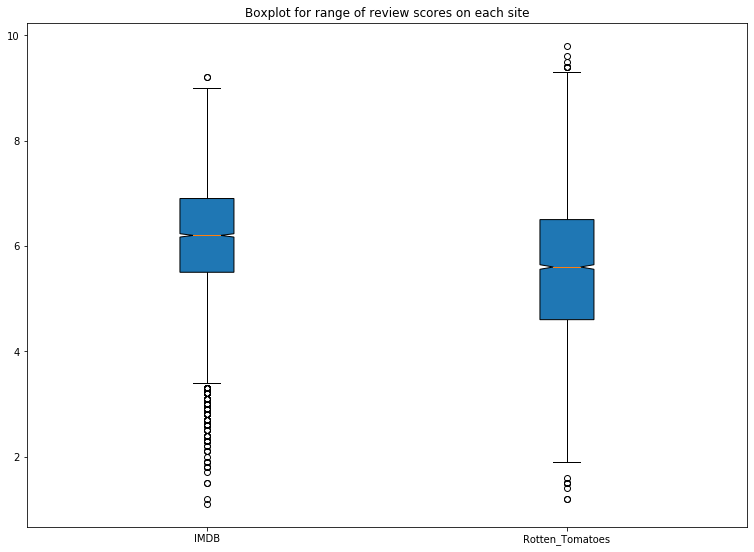

In [19]:
data = [title_tsv_2['IMDB_Rating'], title_tsv_2['Rotten_Tomato_score']]
fig = plt.figure(figsize = (10, 7))
ax = fig.add_axes([0, 0, 1, 1])
ax.set_xticklabels(['IMDB', 'Rotten_Tomatoes'])
bp = ax.boxplot(data, patch_artist = True, notch ='True', vert = 1)
plt.title('Boxplot for range of review scores on each site')
plt.show()

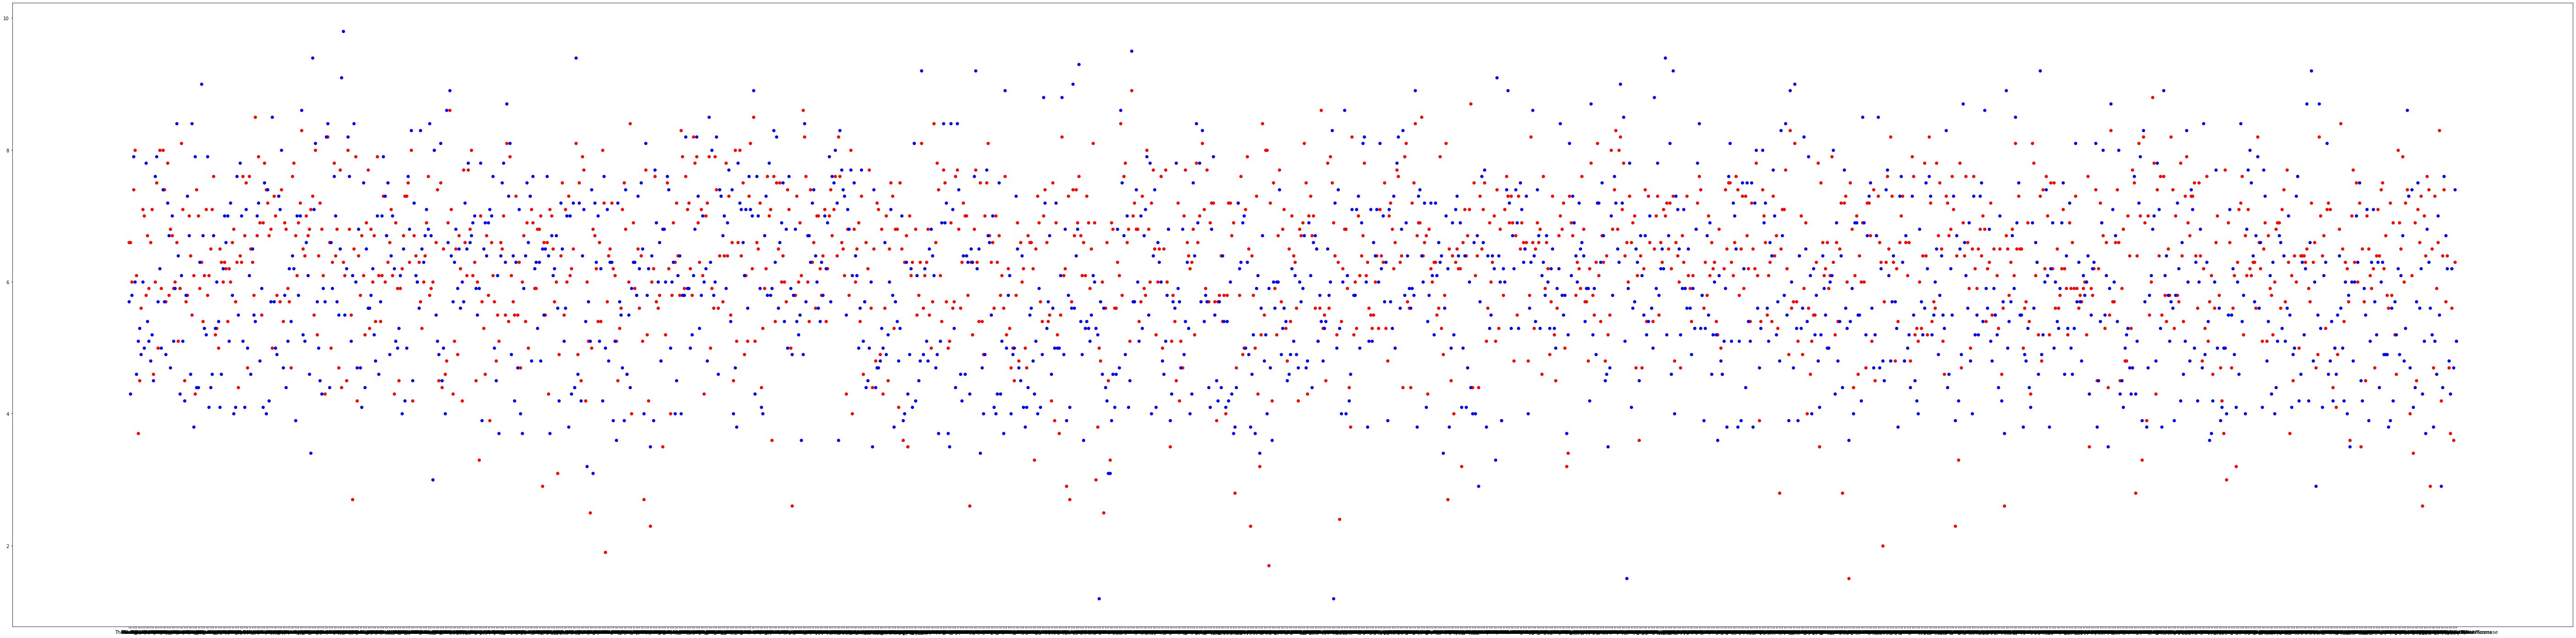

In [20]:
temp1 = title_tsv_2.loc[title_tsv_2['Netflix'] == 1]
temp2 = title_tsv_2.loc[title_tsv_2['Hulu'] == 1]
temp3 = title_tsv_2.loc[title_tsv_2['Prime Video'] == 1]
temp4 = title_tsv_2.loc[title_tsv_2['Disney+'] == 1]

data = [temp1['IMDB_Rating'].to_numpy(), temp1['Rotten_Tomato_score'].to_numpy()]

plt.figure(figsize = (100, 25))

plt.plot(temp1['originalTitle'], temp1['IMDB_Rating'], 'o', color = 'red')
plt.plot(temp1['originalTitle'], temp1['Rotten_Tomato_score'], 'o', color = 'blue')

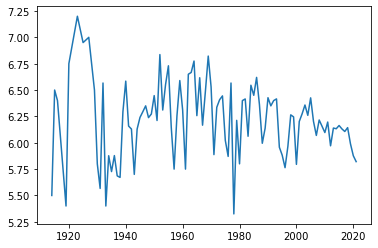

In [21]:
IMDB_avg_ratings_over_time = title_tsv_2[['IMDB_Rating', 'Year']]
IMDB_avg_ratings_over_time = IMDB_avg_ratings_over_time.groupby('Year').mean()
#Aveerage IMDB rating of films released in each year
plt.plot(IMDB_avg_ratings_over_time)

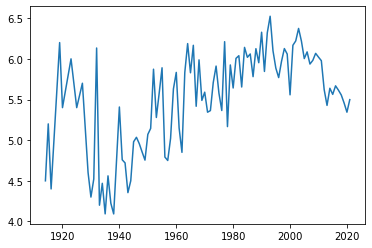

In [22]:
RT_avg_ratings_over_time = title_tsv_2[['Rotten_Tomato_score', 'Year']]
RT_avg_ratings_over_time = RT_avg_ratings_over_time.groupby('Year').mean()
#Aveerage RT rating of films released in each year
plt.plot(RT_avg_ratings_over_time)

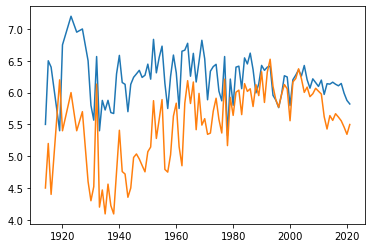

In [23]:
plt.plot(IMDB_avg_ratings_over_time) #blue
plt.plot(RT_avg_ratings_over_time) #orange
plt.show()